In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
array = df.iloc[3,1:]
array = np.array(array)

def display_num(array):
    img_2d = array.reshape(28,28)
    return sns.heatmap(img_2d, cmap = 'Purples')

def display_num_sub(array, position):
    img_2d = array.reshape(28,28)
    return sns.heatmap(img_2d, cmap = 'Purples', ax=position)

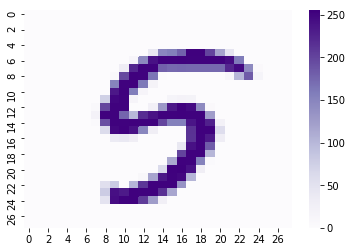

In [4]:
array = np.array(df[df.label==5].iloc[0,1:])

display_num(array)

[]

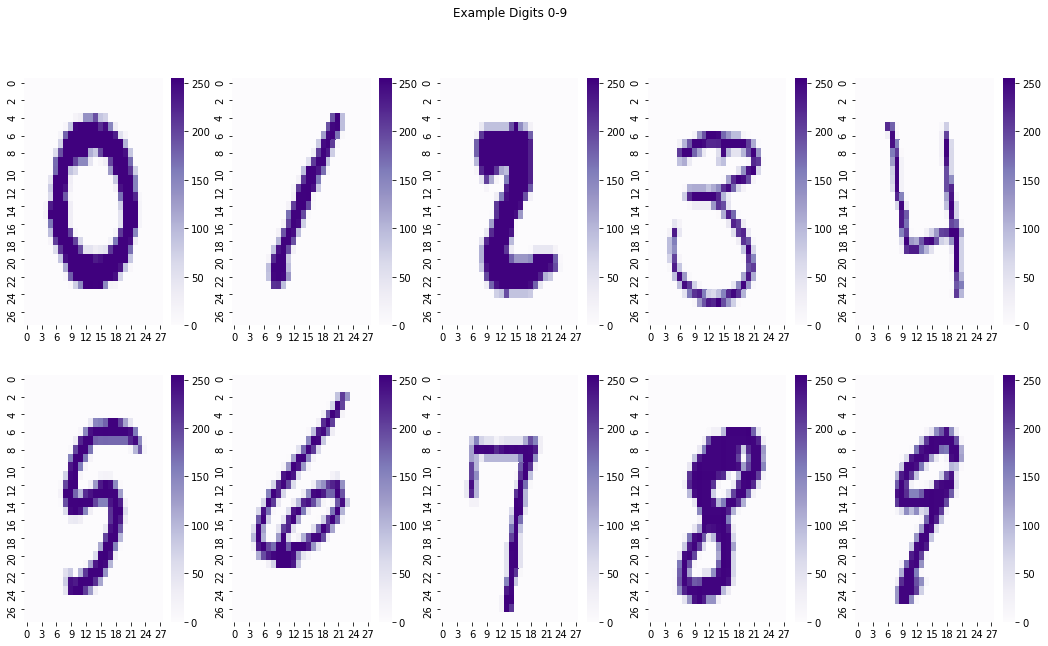

In [5]:
fig, axes = plt.subplots(2, 5, figsize=(18, 10))
fig.suptitle('Example Digits 0-9')

for i in range(10):
    array = np.array(df[df.label==i].iloc[0,1:])
    display_num_sub(array, axes[i//5,i-5])
    
plt.plot()

In [6]:
df.label.value_counts(normalize=True).sort_index()

0    0.098381
1    0.111524
2    0.099452
3    0.103595
4    0.096952
5    0.090357
6    0.098500
7    0.104786
8    0.096738
9    0.099714
Name: label, dtype: float64

<BarContainer object of 10 artists>

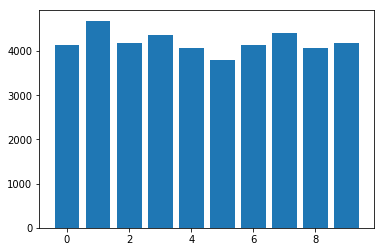

In [7]:
plt.bar(df.label.value_counts().sort_index().index,df.label.value_counts().sort_index().values)

In [8]:
# https://www.geeksforgeeks.org/calculate-the-euclidean-distance-using-numpy/
def l2_dist(v1, v2):
    sum_sq = np.sum(np.square(v1 - v2))
    return np.sqrt(sum_sq)

Closest image to sample of label 0 has label 0
Closest image to sample of label 1 has label 1
Closest image to sample of label 2 has label 2
Closest image to sample of label 3 has label 3
Closest image to sample of label 4 has label 4
Closest image to sample of label 5 has label 5
Closest image to sample of label 6 has label 6
Closest image to sample of label 7 has label 7
Closest image to sample of label 8 has label 8
Closest image to sample of label 9 has label 9


[]

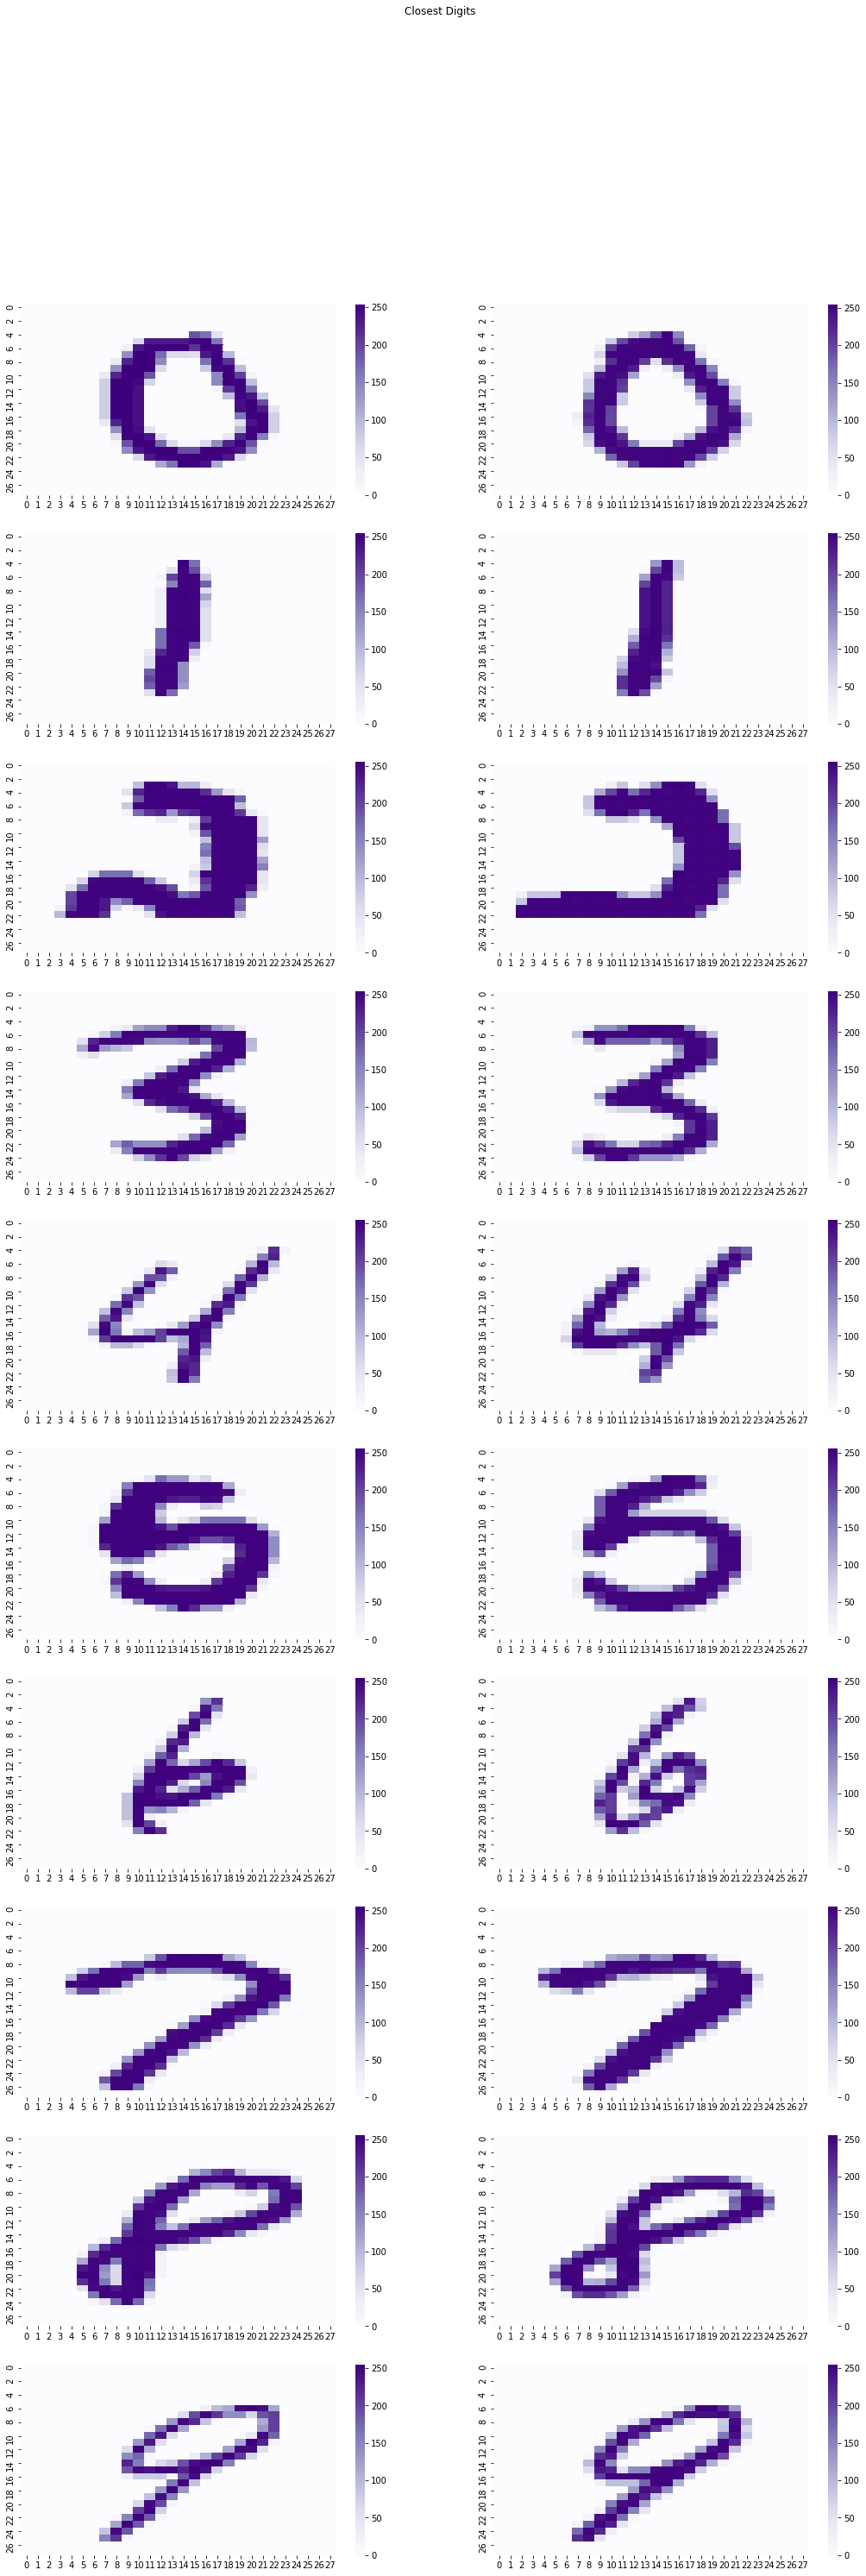

In [47]:
fig, axes = plt.subplots(10, 2, figsize=(18, 48))
fig.suptitle('Closest Digits')

for i in range(10):
    sample = df[df.label==i].sample()
    sample_x = np.array(sample)[0][1:785]

    col_name = 'dist_'+str(i)
    df[col_name] = df.apply(lambda x : l2_dist(sample_x,np.array(x)[1:785]), axis=1)

    best = df[df[col_name]!=0].loc[df[df[col_name]!=0][col_name].idxmin()]
    
    print('Closest image to sample of label '+str(i)+' has label '+str(int(best['label'])))
    
    display_num_sub(sample_x, axes[i,0])
    display_num_sub(np.array(best)[1:785], axes[i,1])
    
plt.plot()